In [2]:
## Basic imports 
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


['Training/female', 'Training/male']
['Validation/female', 'Validation/male']


<BarContainer object of 2 artists>

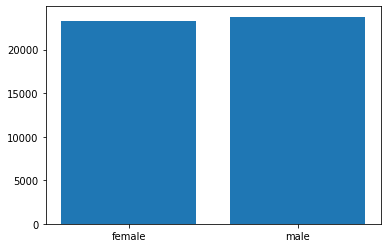

In [3]:
## Basic EDA
import matplotlib.pyplot as plt
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'gender_images/'

## basic directory structure

os.chdir(base_dir)
os.listdir()

## Deduce the labeles 

path_training = 'Training/'
path_validation = 'Validation/'

os.scandir(path_training)
subfolders = sorted([file.path for file in os.scandir(path_training) if file.is_dir()])
print(subfolders)


os.scandir(path_validation)
subfolders = sorted([file.path for file in os.scandir(path_validation) if file.is_dir()])
print(subfolders)

## Counting the number of images in each category


## To check the data imbalance between Male and female
data_size = {x: len(os.listdir(os.path.join(path_training, x))) for x in os.listdir(path_training)}

# Visualize the number of images per class(M or F)
plt.bar(data_size.keys(), data_size.values())






<BarContainer object of 2 artists>

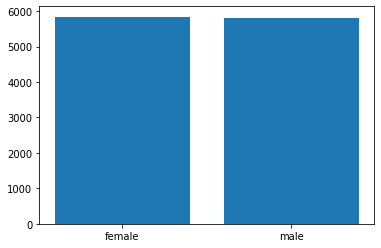

In [4]:
## To check the data imbalance between Male and female in Validation
data_size = {x: len(os.listdir(os.path.join(path_validation, x))) for x in os.listdir(path_validation)}

# Visualize the number of images per class(M or F)
plt.bar(data_size.keys(), data_size.values())

Female image dimension: (98, 76, 3)
Male image dimension (107, 77, 3)


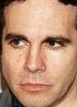

In [5]:
## Take a look at the data images and it's dimension
from matplotlib.image import imread
from PIL import Image
femalepic_path = path_training+'female/131435.jpg.jpg'
female_img = imread(femalepic_path) 
print("Female image dimension:",female_img.shape)

malepic_path = path_training+'male/090634.jpg.jpg'
male_img = imread(malepic_path) 
print("Male image dimension",male_img.shape)

## Display the image 


Image.open(malepic_path)


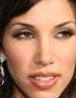

In [6]:
Image.open(femalepic_path)

In [5]:
import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'gender_images/'

os.chdir(base_dir)
os.listdir()

path_training = 'Training/'
path_validation = 'Validation/'

batch_size = 128
## Kept the target size as the lower of two dimension (98,76)



train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')








validation_datagen = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.5)




train_generator = train_datagen.flow_from_directory(
    path_training,
    seed=10,
    target_size=(98,76),
    ##target_size = (224,224),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True
)


validation_generator = validation_datagen.flow_from_directory(
    path_validation,
    seed=10,
    target_size=(98,76),
    ##target_size = (224,224),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    subset = 'training'
)

test_generator = validation_datagen.flow_from_directory(
    path_validation,
    seed=10,
    target_size=(98,76),
    ##target_size = (224,224),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    subset='validation'
)









Found 47035 images belonging to 2 classes.
Found 5822 images belonging to 2 classes.
Found 5821 images belonging to 2 classes.


In [6]:
from keras.optimizers.optimizer_v2.rmsprop import RMSProp
## Build the VGG model 

from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import RMSprop
##from tensorflow.keras.optimizers import RMSprop
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Flatten, Dense
from keras.applications import VGG16


vgg=keras.applications.VGG16(include_top=False, pooling='avg', weights='imagenet',
input_shape=(98,76, 3))

##vgg=keras.applications.VGG16(include_top=False, pooling='avg', weights='imagenet',
##input_shape=(224,224, 3))
# Freeze the layers except the last 5
for layer in vgg.layers[:-5]:
 layer.trainable = False# Check the trainable status of the individual layers
for layer in vgg.layers:
 print(layer, layer.trainable)

 # Create the first model
model = Sequential()# Add the VGG16 convolutional base model
model.add(vgg)
 
# Add new layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2, activation='sigmoid'))

## Compile and Summary
model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics='accuracy')
model.summary()




 # Create the second model
model1 = Sequential()# Add the VGG16 convolutional base model
model1.add(vgg)
 
# Add new layers
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dense(2, activation='sigmoid'))

## Compile and Summary
model1.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()

58889256/58889256 [==============================] - 0s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7fd6d185b4d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd6d1d375d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd6ced02a90> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fd6d1de5b50> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd6d17d0290> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd6d17dc750> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fd6d17dc8d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd6d17e20d0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd6d17f2b10> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd6d17fa6d0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fd6d17f2190> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fd6d1791950> False
<keras.layers.convolutional.con

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 14,781,122
Trainable params: 7,145,602
Non-trainable params: 7,635,520
_________________________________________________________________


In [ ]:



rms_optimizer_model = 'rms_opt.h5'
checkpoint_callback = ModelCheckpoint(rms_optimizer_model,
                                     monitor='val_accuracy',
                                      verbose=2)


hist =  model.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=5,
                           epochs=30,
                           callbacks=[checkpoint_callback])                  





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: 0.6375 - accuracy: 0.6609  
Epoch 1: saving model to rms_opt.h5
5/5 [==============================] - 918s 217s/step - loss: 0.6375 - accuracy: 0.6609 - val_loss: 0.7952 - val_accuracy: 0.5046
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: 0.4075 - accuracy: 0.8219 
Epoch 2: saving model to rms_opt.h5
5/5 [==============================] - 504s 120s/step - loss: 0.4075 - accuracy: 0.8219 - val_loss: 0.6118 - val_accuracy: 0.6709
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: 0.3639 - accuracy: 0.8500 
Epoch 3: saving model to rms_opt.h5
5/5 [==============================] - 492s 118s/step - loss: 0.3639 - accuracy: 0.8500 - val_loss: 0.4880 - val_accuracy: 0.7838
Epoch 4/30
5/5 [==============================] - ETA: 0s - loss: 0.3106 - accuracy: 0.8906 
Epoch 4: saving model to rms_opt.h5
5/5 [==============================] - 502s 120s/step - loss: 0.3106 - accuracy: 0.8906 - val

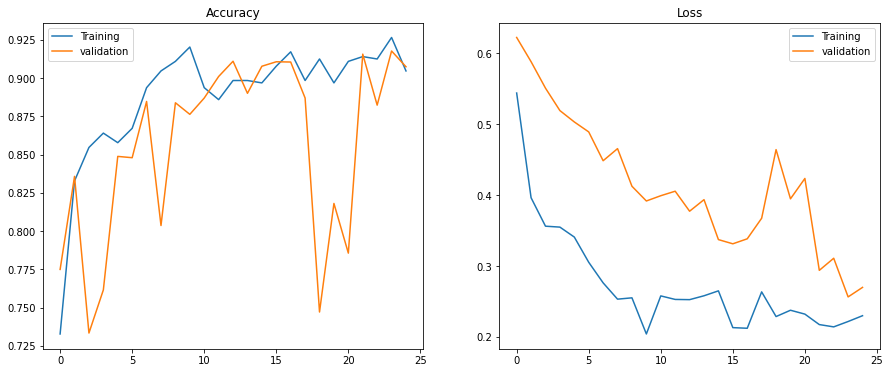

In [ ]:
import matplotlib.pyplot as plt
## plot the chart 
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()




In [10]:
# Set early stopping after certain number of epochs
callback1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

hist1 =  model1.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=5,
                           epochs=25,
                           callbacks=[callback1])                  

## try saving under new name as well for backup
model1.save('vgg16_4.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
5/5 [==============================] - 779s 175s/step - loss: 0.5895 - accuracy: 0.7063 - val_loss: 0.6461 - val_accuracy: 0.6615
Epoch 2/25
5/5 [==============================] - 771s 174s/step - loss: 0.5502 - accuracy: 0.7578 - val_loss: 0.6324 - val_accuracy: 0.6791
Epoch 3/25
5/5 [==============================] - 764s 173s/step - loss: 0.5441 - accuracy: 0.7547 - val_loss: 0.6204 - val_accuracy: 0.6984
Epoch 4/25
5/5 [==============================] - 756s 170s/step - loss: 0.5069 - accuracy: 0.7484 - val_loss: 0.6074 - val_accuracy: 0.7252
Epoch 5/25
5/5 [==============================] - 749s 168s/step - loss: 0.4953 - accuracy: 0.7609 - val_loss: 0.5967 - val_accuracy: 0.7381
Epoch 6/25
5/5 [==============================] - 748s 170s/step - loss: 0.4592 - accuracy: 0.8047 - val_loss: 0.5870 - val_accuracy: 0.7482
Epoch 7/25
5/5 [==============================] - 741s 167s/step - loss: 0.4404 - accuracy: 0.8141 - val_loss: 0.5793 - val_accuracy: 0.7583
Epoch 8/25
5/

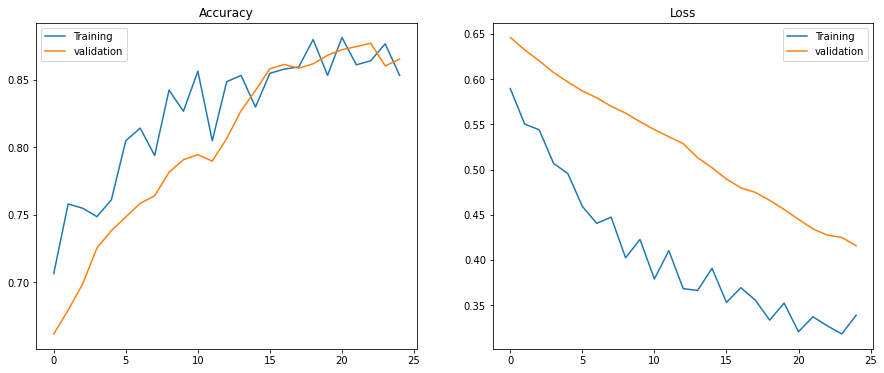

In [11]:

import matplotlib.pyplot as plt
## plot the chart 
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist1.epoch,hist1.history['accuracy'],label = 'Training')
plt.plot(hist1.epoch,hist1.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist1.epoch,hist1.history['loss'],label = 'Training')
plt.plot(hist1.epoch,hist1.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()


In [12]:
from keras.models import load_model
import os

from sklearn.metrics import classification_report,confusion_matrix

## Training classification report

train_predictions =  model1.predict(train_generator) 
train_labels = train_generator.classes

train_predictions_rounded_labels=np.argmax(train_predictions, axis=1)

print(classification_report(train_labels,train_predictions_rounded_labels)) 



## validation classification report


validation_predictions = model1.predict(validation_generator)
valid_labels = validation_generator.classes

predictions_rounded_labels=np.argmax(validation_predictions, axis=1)

print(classification_report(valid_labels,predictions_rounded_labels))

## UTK Dataset 


368/368 [==============================] - 16285s 44s/step
              precision    recall  f1-score   support

           0       0.50      0.55      0.52     23269
           1       0.51      0.45      0.48     23766

    accuracy                           0.50     47035
   macro avg       0.50      0.50      0.50     47035
weighted avg       0.50      0.50      0.50     47035

46/46 [==============================] - 438s 10s/step
              precision    recall  f1-score   support

           0       0.49      0.56      0.52      2921
           1       0.49      0.42      0.45      2901

    accuracy                           0.49      5822
   macro avg       0.49      0.49      0.49      5822
weighted avg       0.49      0.49      0.49      5822



In [ ]:
batch_size = 128

Y_pred = model1.predict(test_generator, 5821 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = ['female','male']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


In [14]:


utk_path ='utkdataset/'

utk_generator = validation_datagen.flow_from_directory(
    utk_path,
    seed=10,
    target_size=(98,76),
    ##target_size = (224,224),
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True
)
from keras.models import load_model
import os

from sklearn.metrics import classification_report,confusion_matrix

## Training classification report

utk_predictions =  model1.predict(utk_generator) 
utk_labels = utk_generator.classes

utk_predictions_rounded_labels=np.argmax(utk_predictions, axis=1)

print(classification_report(utk_labels,utk_predictions_rounded_labels)) 








Found 1453 images belonging to 2 classes.
12/12 [==============================] - 113s 9s/step
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      1447
           1       0.00      0.33      0.01         6

    accuracy                           0.64      1453
   macro avg       0.50      0.49      0.39      1453
weighted avg       0.99      0.64      0.77      1453

